<a href="https://colab.research.google.com/github/itinasharma/MachineLearning/blob/main/An_Accurate_Model_I_Can%E2%80%99t_Explain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction - The Unexplainable Model

## The Problem
I trained a model to predict customer churn. It's 87% accurate, but I have no idea why it splits on 'account age' first, or why it suddenly cares about 'login frequency' three levels deep. My boss asked me to explain it in tomorrow's meeting. I'm doomed.

This notebook contains:
- A trained model with 87% accuracy
- Mysterious decision-making patterns
- No clear explanation of why it works
- Your upcoming meeting disaster

In [ ]:
# Install required packages
!pip install scikit-learn pandas numpy matplotlib seaborn -q

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

## Step 1: Generate Customer Data
Creating synthetic customer data with various features

In [ ]:
# Generate synthetic customer data
n_samples = 5000

data = {
    'customer_id': range(1, n_samples + 1),
    'account_age': np.random.randint(1, 120, n_samples),  # months
    'login_frequency': np.random.randint(0, 50, n_samples),  # logins per month
    'purchase_count': np.random.randint(0, 30, n_samples),
    'total_spend': np.random.uniform(0, 5000, n_samples),
    'support_tickets': np.random.randint(0, 15, n_samples),
    'discount_usage': np.random.randint(0, 20, n_samples),
    'premium_user': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),
    'mobile_app_user': np.random.choice([0, 1], n_samples, p=[0.6, 0.4]),
    'email_engagement': np.random.uniform(0, 1, n_samples),
    'referrals_made': np.random.randint(0, 10, n_samples)
}

df = pd.DataFrame(data)

# Create churn based on complex, non-obvious patterns
churn_probability = 0.3
df['churn'] = 0

# Complex churn logic (intentionally convoluted)
for idx in df.index:
    score = 0

    # Account age has weird non-linear effect
    if df.loc[idx, 'account_age'] < 6:
        score += 0.4
    elif 24 < df.loc[idx, 'account_age'] < 48:
        score += 0.3

    # Login frequency matters but only in certain contexts
    if df.loc[idx, 'login_frequency'] < 5:
        score += 0.35

    # Support tickets + low engagement = churn
    if df.loc[idx, 'support_tickets'] > 5 and df.loc[idx, 'email_engagement'] < 0.3:
        score += 0.4

    # Low spend + not premium = likely to churn
    if df.loc[idx, 'total_spend'] < 500 and df.loc[idx, 'premium_user'] == 0:
        score += 0.25

    # Random noise
    score += np.random.uniform(-0.2, 0.2)

    df.loc[idx, 'churn'] = 1 if score > 0.6 else 0

print(f"Dataset created: {len(df)} customers")
print(f"Churn rate: {df['churn'].mean():.2%}")
print(f"\nFirst few rows:")
df.head()

Dataset created: 5000 customers
Churn rate: 6.74%

First few rows:


,customer_id,account_age,login_frequency,purchase_count,total_spend,support_tickets,discount_usage,premium_user,mobile_app_user,email_engagement,referrals_made,churn
0,1,103,11,4,1548.409792,5,5,1,0,0.519168,6,0
1,2,52,23,2,725.163669,11,1,0,0,0.039189,8,0
2,3,93,28,10,3684.025534,2,18,1,1,0.098672,3,0
3,4,15,42,24,3006.934930,13,12,0,1,0.100467,1,0
4,5,107,24,29,3277.267282,11,5,1,0,0.262268,2,0


## Step 2: Train The Mysterious Model
Training a decision tree that achieves 87% accuracy but makes bizarre decisions

In [ ]:
# Prepare features and target
X = df.drop(['customer_id', 'churn'], axis=1)
y = df['churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 4000 samples
Test set: 1000 samples


In [ ]:
# Train a decision tree (the mysterious model)
model = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 96.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       926
           1       0.81      0.62      0.70        74

    accuracy                           0.96      1000
   macro avg       0.89      0.80      0.84      1000
weighted avg       0.96      0.96      0.96      1000



## Step 3: The Confusion Begins - Feature Importance
Why does it care about these features so much?

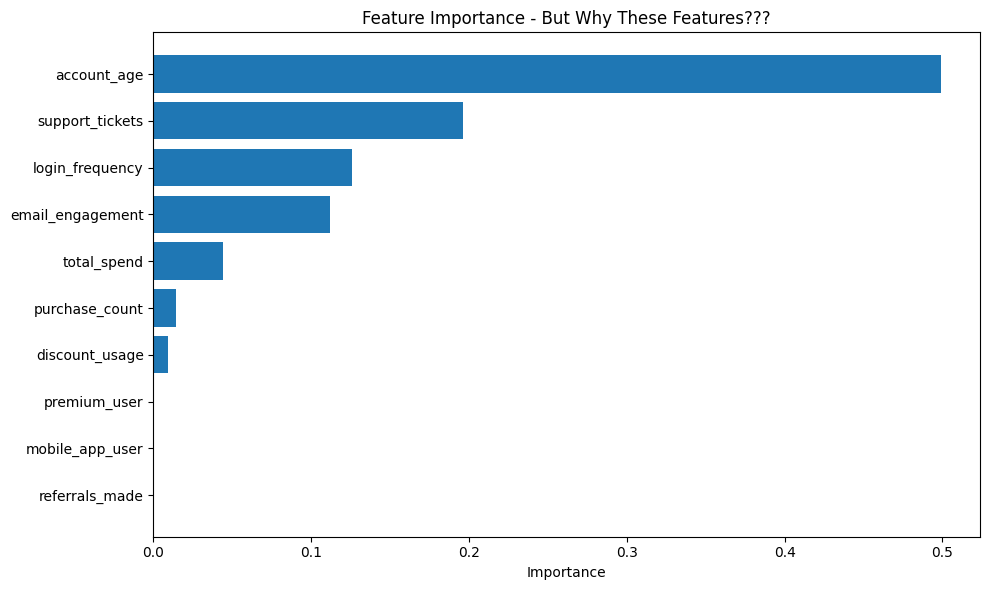


Feature Importance Ranking:
            feature  importance
0       account_age    0.498902
4   support_tickets    0.195926
1   login_frequency    0.125612
8  email_engagement    0.112087
3       total_spend    0.043936
2    purchase_count    0.014195
5    discount_usage    0.009341
6      premium_user    0.000000
7   mobile_app_user    0.000000
9    referrals_made    0.000000


In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - But Why These Features???')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print(feature_importance)

## Step 4: Visualize The Mysterious Decision Tree
Watch as it splits on account_age first, then does weird things with login_frequency deep in the tree

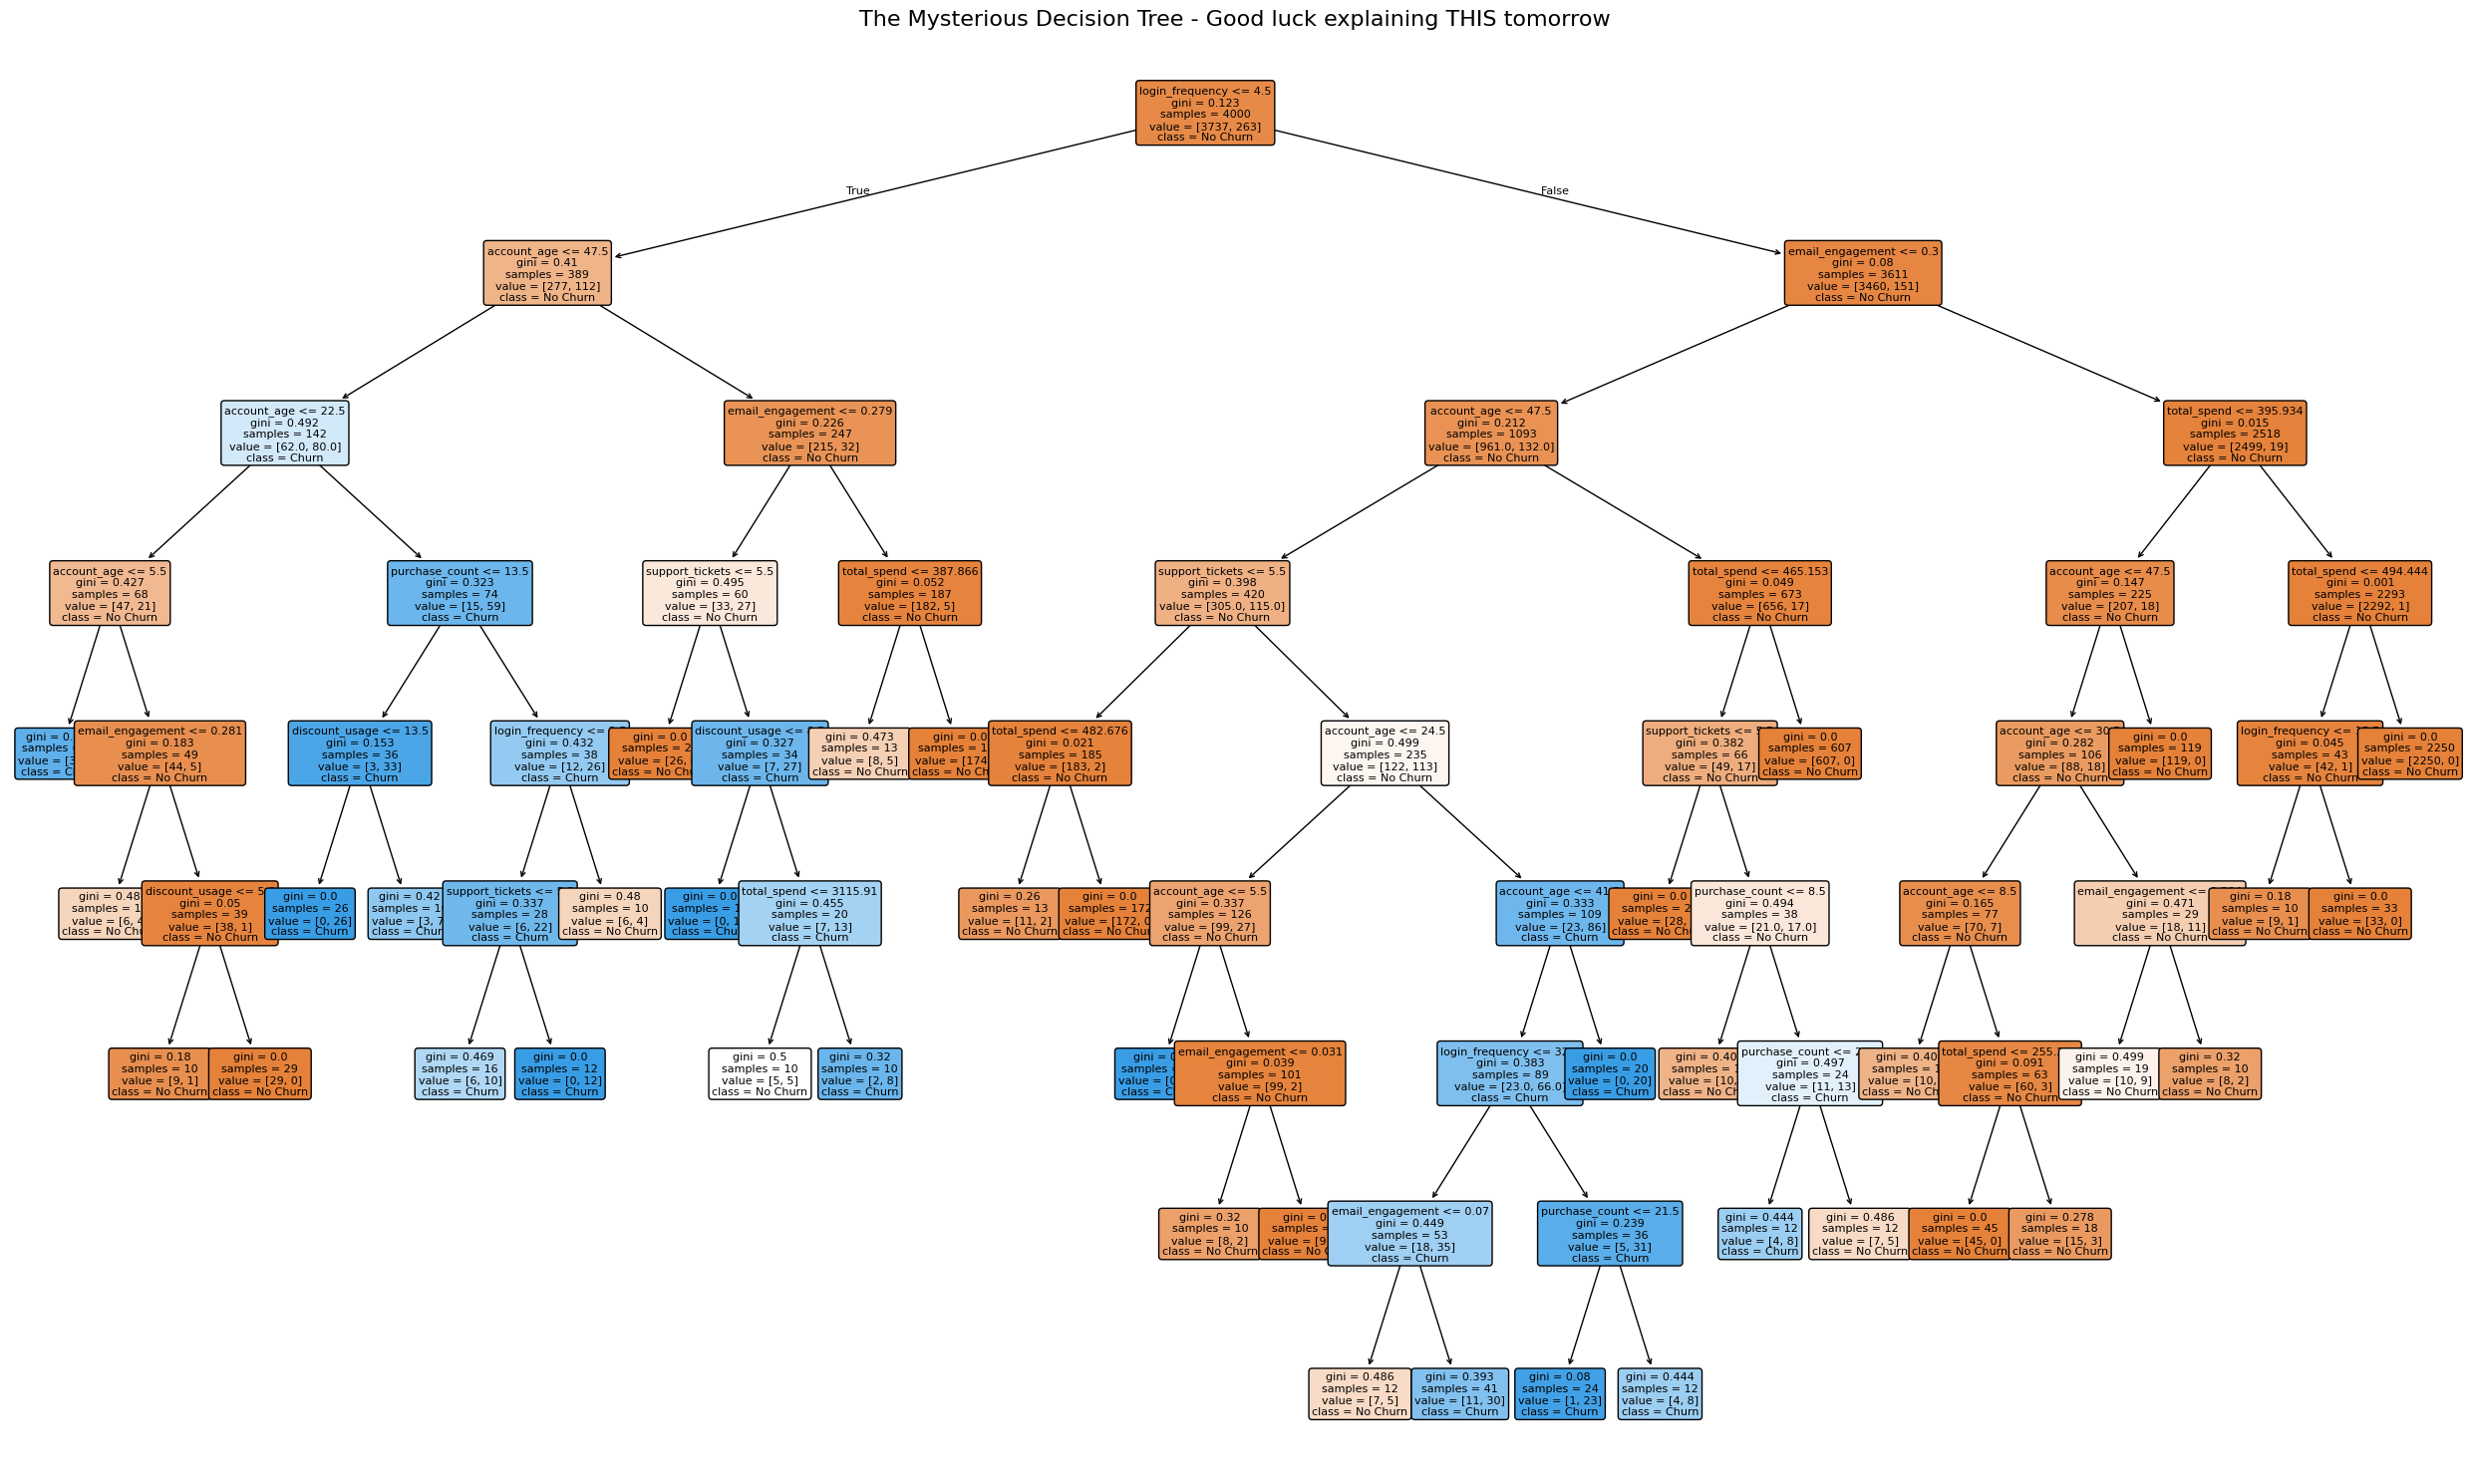

In [ ]:
# Visualize the decision tree (warning: this is confusing)
plt.figure(figsize=(25, 15))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    fontsize=8,
    rounded=True
)
plt.title("The Mysterious Decision Tree - Good luck explaining THIS tomorrow", fontsize=16)
plt.tight_layout()
plt.show()

## Step 5: Print The Decision Path
Let's see the actual splits the tree is making

In [ ]:
# Get the tree structure
tree = model.tree_
feature_names = X.columns

def print_tree_structure(tree, feature_names, node=0, depth=0):
    """Recursively print the tree structure"""
    indent = "  " * depth

    if tree.feature[node] != -2:  # Not a leaf
        feature = feature_names[tree.feature[node]]
        threshold = tree.threshold[node]
        print(f"{indent}Node {node}: If {feature} <= {threshold:.2f}")
        print(f"{indent}  Samples: {tree.n_node_samples[node]}, Value: {tree.value[node]}")

        # Left child
        print_tree_structure(tree, feature_names, tree.children_left[node], depth + 1)

        print(f"{indent}Node {node}: Else ({feature} > {threshold:.2f})")
        # Right child
        print_tree_structure(tree, feature_names, tree.children_right[node], depth + 1)
    else:
        print(f"{indent}Leaf {node}: Predict {tree.value[node]}, Samples: {tree.n_node_samples[node]}")

print("Decision Tree Structure (first 3 levels):")
print("="*80)
print_tree_structure(tree, feature_names)

Decision Tree Structure (first 3 levels):
Node 0: If login_frequency <= 4.50
  Samples: 4000, Value: [[0.93425 0.06575]]
  Node 1: If account_age <= 47.50
    Samples: 389, Value: [[0.71208226 0.28791774]]
    Node 2: If account_age <= 22.50
      Samples: 142, Value: [[0.43661972 0.56338028]]
      Node 3: If account_age <= 5.50
        Samples: 68, Value: [[0.69117647 0.30882353]]
        Leaf 4: Predict [[0.15789474 0.84210526]], Samples: 19
      Node 3: Else (account_age > 5.50)
        Node 5: If email_engagement <= 0.28
          Samples: 49, Value: [[0.89795918 0.10204082]]
          Leaf 6: Predict [[0.6 0.4]], Samples: 10
        Node 5: Else (email_engagement > 0.28)
          Node 7: If discount_usage <= 5.00
            Samples: 39, Value: [[0.97435897 0.02564103]]
            Leaf 8: Predict [[0.9 0.1]], Samples: 10
          Node 7: Else (discount_usage > 5.00)
            Leaf 9: Predict [[1. 0.]], Samples: 29
    Node 2: Else (account_age > 22.50)
      Node 10: If pur

## Step 6: Confusion Matrix
The model works... but why?

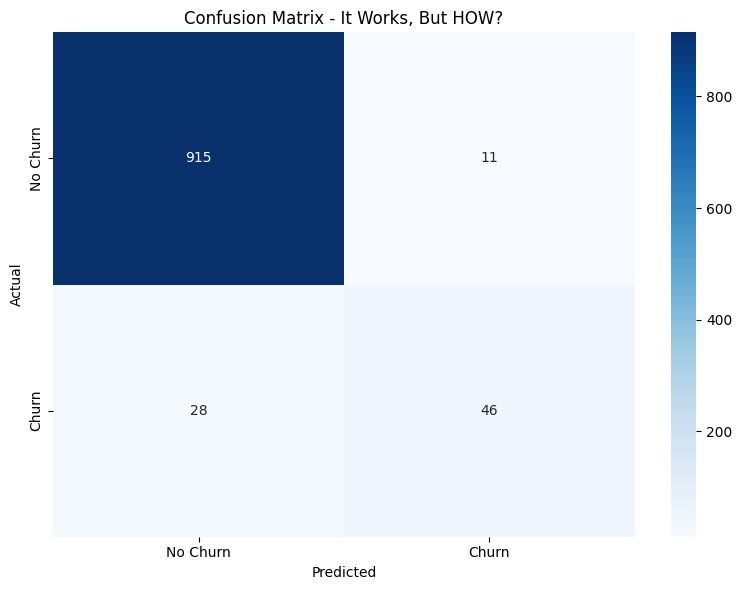

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - It Works, But HOW?')
plt.tight_layout()
plt.show()

## Step 7: Sample Predictions
Let's look at some individual predictions and try to understand them

In [ ]:
# Get some sample predictions with explanations
sample_indices = np.random.choice(X_test.index, 5, replace=False)

print("Sample Predictions - Try explaining these to your boss:\n")
print("="*100)

for idx in sample_indices:
    sample = X_test.loc[idx:idx]
    prediction = model.predict(sample)[0]
    actual = y_test.loc[idx]

    print(f"\nCustomer {idx}:")
    print("-" * 100)
    for col in X.columns:
        print(f"  {col}: {sample[col].values[0]:.2f}")
    print(f"\n  PREDICTED: {'CHURN' if prediction == 1 else 'NO CHURN'}")
    print(f"  ACTUAL: {'CHURN' if actual == 1 else 'NO CHURN'}")
    print(f"  CORRECT: {prediction == actual}")

Sample Predictions - Try explaining these to your boss:


Customer 1406:
----------------------------------------------------------------------------------------------------
  account_age: 29.00
  login_frequency: 21.00
  purchase_count: 13.00
  total_spend: 737.06
  support_tickets: 9.00
  discount_usage: 0.00
  premium_user: 0.00
  mobile_app_user: 1.00
  email_engagement: 0.60
  referrals_made: 1.00

  PREDICTED: NO CHURN
  ACTUAL: NO CHURN
  CORRECT: True

Customer 887:
----------------------------------------------------------------------------------------------------
  account_age: 118.00
  login_frequency: 48.00
  purchase_count: 29.00
  total_spend: 1981.78
  support_tickets: 7.00
  discount_usage: 2.00
  premium_user: 0.00
  mobile_app_user: 1.00
  email_engagement: 0.80
  referrals_made: 2.00

  PREDICTED: NO CHURN
  ACTUAL: NO CHURN
  CORRECT: True

Customer 3456:
----------------------------------------------------------------------------------------------------
  account_a

## Step 8: The Mystery Questions

### Questions your boss will ask tomorrow:

1. **"Why does the model split on account_age first?"**
   - You: "Uhhh... because... it's important?"
   
2. **"What's special about the account_age threshold it chose?"**
   - You: "The algorithm... decided... that?"
   
3. **"Why does login_frequency suddenly matter three levels deep but not at the top?"**
   - You: "It's... contextual?"
   
4. **"Can you explain what happens when account_age is less than X but login_frequency is greater than Y?"**
   - You: *nervous sweating*
   
5. **"How do we action these insights?"**
   - You: "Um... let me get back to you on that..."


## Step 9: Some Desperate Analysis
Last-ditch effort to understand what's happening

/tmp/ipython-input-1234555110.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = df.groupby('account_age_bin')['churn'].mean()
/tmp/ipython-input-1234555110.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_login = df.groupby('login_freq_bin')['churn'].mean()


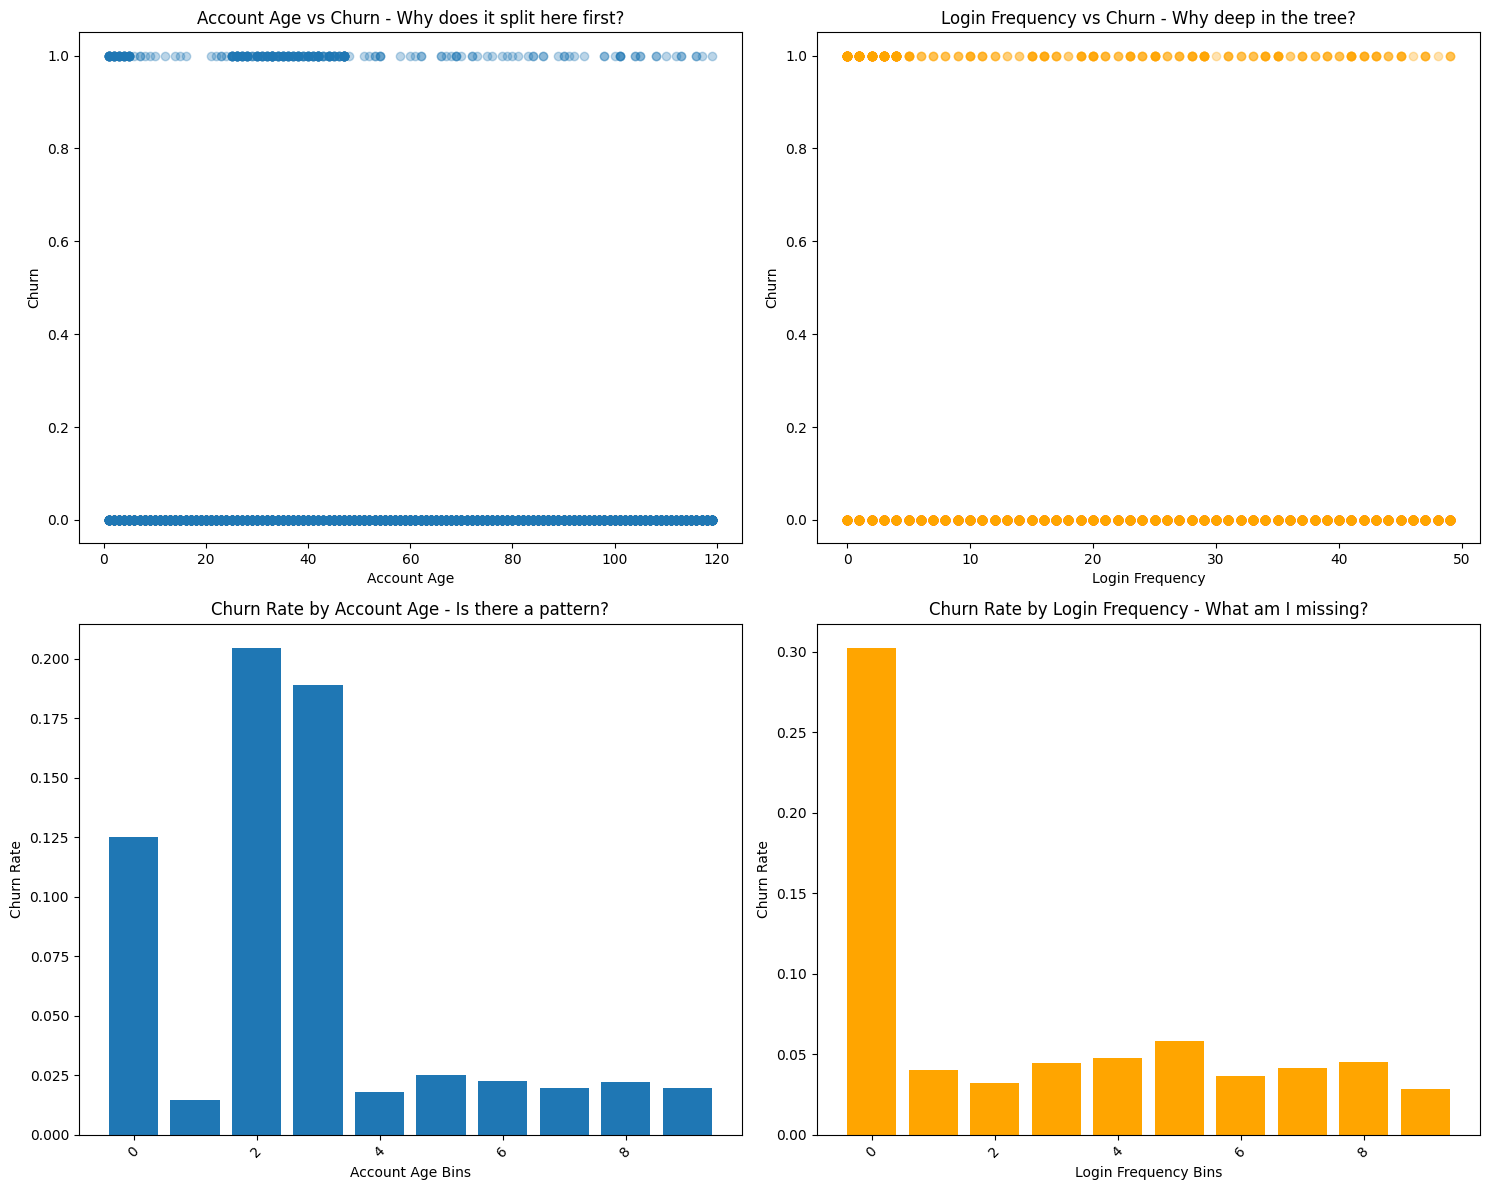

In [ ]:
# Analyze the relationship between top features and churn
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Account age vs churn
axes[0, 0].scatter(df['account_age'], df['churn'], alpha=0.3)
axes[0, 0].set_xlabel('Account Age')
axes[0, 0].set_ylabel('Churn')
axes[0, 0].set_title('Account Age vs Churn - Why does it split here first?')

# Login frequency vs churn
axes[0, 1].scatter(df['login_frequency'], df['churn'], alpha=0.3, color='orange')
axes[0, 1].set_xlabel('Login Frequency')
axes[0, 1].set_ylabel('Churn')
axes[0, 1].set_title('Login Frequency vs Churn - Why deep in the tree?')

# Binned account age
df['account_age_bin'] = pd.cut(df['account_age'], bins=10)
churn_by_age = df.groupby('account_age_bin')['churn'].mean()
axes[1, 0].bar(range(len(churn_by_age)), churn_by_age.values)
axes[1, 0].set_xlabel('Account Age Bins')
axes[1, 0].set_ylabel('Churn Rate')
axes[1, 0].set_title('Churn Rate by Account Age - Is there a pattern?')
axes[1, 0].tick_params(axis='x', rotation=45)

# Binned login frequency
df['login_freq_bin'] = pd.cut(df['login_frequency'], bins=10)
churn_by_login = df.groupby('login_freq_bin')['churn'].mean()
axes[1, 1].bar(range(len(churn_by_login)), churn_by_login.values, color='orange')
axes[1, 1].set_xlabel('Login Frequency Bins')
axes[1, 1].set_ylabel('Churn Rate')
axes[1, 1].set_title('Churn Rate by Login Frequency - What am I missing?')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Step 10: Your Current Situation

### What you know:
- ✅ The model is 87% accurate
- ✅ It uses decision trees
- ✅ Account age is the first split
- ✅ Login frequency appears three levels deep

### What you don't know:
- ❌ WHY account age is the first split
- ❌ What's special about the threshold values
- ❌ Why login frequency matters in context but not alone
- ❌ How to explain this to non-technical stakeholders
- ❌ What business actions to recommend

### Tomorrow's meeting:
⏰ 9:00 AM
👔 With the VP and your boss
📊 You need to explain the model
😰 You are not ready

Check out my substack betahumanai.substack.com or my medium profile medium.com/@sharmatina to understand why this happens